## Nobel Twin Study Serum Metabolomic Diversity Analysis

**Authors: Stephanie Flores-Ramos and Tobin Groth (tgroth@ucsd.edu)**

This is the workflow I used to analyze the alpha and beta diversity between the metabolites of non-NAFLD controls, NAFLD no advanced fribrosis, and NAFLD-cirrhosis probands. Based on the microbiome notebook with the same name written by Anupriya Tripathi for microbiome analysis (a3tripat@ucsd.edu).

In [2]:
#import plugins 

import qiime2
import pandas as pd
import biom
import itertools
import seaborn as sns
import skbio.stats.distance as ssd
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import os
import statistics

%matplotlib inline

os.chdir('/Users/tgroth/Google Drive/knight_twin_nafld/serum_analysis/')

**we are using QIIME2 Jupyter API to load the alpha and beta-diversity tables**

In [4]:
table = qiime2.Artifact.load('./feature_tables/serum-ft-matched.qza')
tablepd = table.view(pd.DataFrame)
print(tablepd.shape)
tablepd.head(5)

(167, 1607)


,004669f18768de8777ab02b5eed2165b,0063a016480cb00cc62af310cb1ca746,006bd617624c9f170df9372dd3ff6487,0073e5797097eb7c25e03ad5356a2954,00e4514c7dcfba955015cd25595af942,011e61c96c8d2521dc8b0c54cdab4076,01286b7f01dae6ab0660c79a1998ba23,0143d5c54180a2de7d38e7efa0b756b8,01459d6ea6596b8f9b91fec668d3a00b,01e2b489b271315160c5394854aef1be,...,ff4e3b424a3e71dfc49ac13a310835da,ff701fb5ca565cdb50764430730d0043,ff801064bbbe791c69467e2065cf7782,ff8674831b6662f5f7595ed2f73dfd4b,ff925d1aaea7b3964e8db94bee3e3e23,ffb84b6398f7bbc3d4166c9dcd6c6db7,ffc1f86e5f21b3eae64c287a000305b7,ffc773a4760c2c888b1752ec6cadbdd0,ffc9bea70abf3c54724a2e0dc386ce00,ffccfaf24b05a13ac8cc725a5cb93b3f
TW-CO-002,13482.9175,1728.547,39264.7140,198.1070,152.320,703.892,8193.6790,1358.4665,2225.7430,29210.1555,...,26854.6490,25479.218,107.1630,42909.3740,19609.6605,4563.5160,2375.8580,83236.0950,391.1880,3154.1725
TW-BT-001,18231.1270,238.272,65264.7285,440.0080,155.797,0.000,74410.0835,1227.2790,1206.9795,51765.6815,...,25581.0385,33933.565,14877.4745,40394.0590,39989.3425,12248.6935,6332.2265,578582.0940,3390.1785,8678.9145
TW-CA-002,19558.1230,174.423,109720.6100,0.0000,0.000,0.000,128846.6325,2199.1390,6371.2270,61950.6475,...,30272.5130,28787.334,19124.6915,40433.6070,18785.2260,36733.7495,6905.1055,85905.8160,95.7870,46600.2255
TW-BD-002,20064.1475,178.485,82165.3325,227.0745,229.990,4681.250,20565.8620,487.0680,1697.0570,52093.5975,...,13123.7500,18023.704,15492.9325,41304.3155,9703.7965,8035.3380,5038.4350,32920.7225,186.6600,8771.7540
TW-AV-001,16663.9950,93.869,157833.9945,266.9745,177.670,0.000,61434.0385,3264.4685,2581.8910,28586.0615,...,9652.3500,12750.268,11701.9760,43865.4150,28067.2155,6434.9640,7262.8030,99372.8260,106.3120,2719.0910


### Calculating the alpha diversity

To do this we used the qiime plugin to calculate shannon diversity, observed OTUs, and Faith's PD. For alpha diversity we will be using the `serum-ft-matched.qza` feature table.

In [41]:
#The alpha diveristy using 'shannon' 
! qiime diversity alpha \
--i-table ./feature_tables/serum-ft-matched.qza \
--p-metric shannon \
--o-alpha-diversity ./diversity_analysis/tables/alpha_shannon_serum.qza

Saved SampleData[AlphaDiversity] to: ./diversity_analysis/tables/alpha_shannon_serum.qza


In [42]:
! qiime tools export \
--input-path ./diversity_analysis/tables/alpha_shannon_serum.qza \
--output-path ./diversity_analysis/tables/alpha_shannon_serum

Exported ./diversity_analysis/tables/alpha_shannon_serum.qza as AlphaDiversityDirectoryFormat to directory ./diversity_analysis/tables/alpha_shannon_serum


In [44]:
#The alpha diveristy using 'observed_otus'  
! qiime diversity alpha \
--i-table ./feature_tables/serum-ft-matched.qza \
--p-metric observed_otus \
--o-alpha-diversity ./diversity_analysis/tables/alpha_obsotus_serum.qza

Saved SampleData[AlphaDiversity] to: ./diversity_analysis/tables/alpha_obsotus_serum.qza


In [45]:
! qiime tools export \
--input-path ./diversity_analysis/tables/alpha_obsotus_serum.qza \
--output-path ./diversity_analysis/tables/alpha_obsotus_serum

Exported ./diversity_analysis/tables/alpha_obsotus_serum.qza as AlphaDiversityDirectoryFormat to directory ./diversity_analysis/tables/alpha_obsotus_serum


In [46]:
#The alpha diversity using 'Faith PD'
! qiime diversity alpha-phylogenetic \
--i-table ./feature_tables/serum-ft-matched.qza \
--i-phylogeny ./diversity_analysis/qemistree-serum.qza \
--p-metric faith_pd \
--o-alpha-diversity ./diversity_analysis/tables/alpha_faithpd_serum.qza

Saved SampleData[AlphaDiversity] % Properties('phylogenetic') to: ./diversity_analysis/tables/alpha_faithpd_serum.qza


In [47]:
! qiime tools export \
--input-path ./diversity_analysis/tables/alpha_faithpd_serum.qza \
--output-path ./diversity_analysis/tables/alpha_faithpd_serum

Exported ./diversity_analysis/tables/alpha_faithpd_serum.qza as AlphaDiversityDirectoryFormat to directory ./diversity_analysis/tables/alpha_faithpd_serum


### 1a. plotting trends in alpha diversity (Shannon's Diversity)

In [7]:
md = pd.read_table('../metadata-matched.tsv', sep='\t', index_col=0)
adiv = pd.read_table('./diversity_analysis/tables/alpha_shannon_serum/alpha-diversity.tsv', index_col=0)
adiv.head()

,shannon
TW-CO-002,6.701779
TW-BT-001,7.259942
TW-CA-002,7.037805
TW-BD-002,6.486814
TW-AV-001,6.693658


In [49]:
# alpha-div
adiv['groups'] = [md.loc[idx, 'ATTRIBUTE_groups'] for idx in adiv.index]

In [50]:
# save source data
adiv.reset_index().rename(columns={'index':'#SampleID'}).to_csv('./diversity_analysis/tables/alpha_shannon_serum/source_data_alpha_diversity_serum_shannon.csv', 
                                                                sep=',', index=False)

In [51]:
adiv.groups.value_counts()

G1P    48
G1R    37
G3R    30
G3P    22
G2P    16
G2R    14
Name: groups, dtype: int64

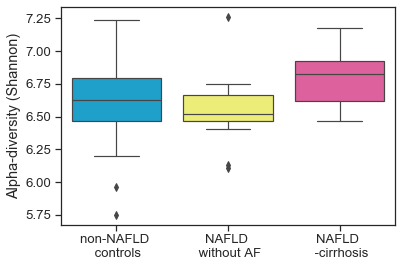

In [52]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
fig = sns.boxplot(y='shannon', x='groups', order=['G1P', 'G2P', 'G3P'], data=adiv, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Alpha-diversity (Shannon)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
plt.savefig('./diversity_analysis/figures/adiv_shannon_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [53]:
ag1 = [adiv.loc[idx, 'shannon'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G1P']
ag2 = [adiv.loc[idx, 'shannon'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G2P']
ag3 = [adiv.loc[idx, 'shannon'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G3P']

In [54]:
# kruskal-wallis significance testing
print(statistics.median(ag1))
print(statistics.median(ag2))
print(statistics.median(ag3))
print(kruskal(ag1, ag2))
print(kruskal(ag2, ag3))
print(kruskal(ag1, ag3))

6.624979751230033
6.51837422212186
6.823865373129323
KruskalResult(statistic=1.2810096153846473, pvalue=0.2577113987794899)
KruskalResult(statistic=8.91695804195804, pvalue=0.0028253472524502423)
KruskalResult(statistic=6.99119718309862, pvalue=0.008191154822553974)


Here we see the hourglass trend where the NAFLD w/o AF group has the lowest diversity compared to the other disease states. There is a significant difference between NAFLD-cirrhosis samples both non-NAFLS samples (p<0.01) and NAFLD w/o AF samples (p<0.01)

### 1b. plotting trends in alpha diversity (Observed OTUS)

In [55]:
adiv = pd.read_table('diversity_analysis/tables/alpha_obsotus_serum/alpha-diversity.tsv', index_col=0)

In [56]:
# alpha-div
adiv['groups'] = [md.loc[idx, 'ATTRIBUTE_groups'] for idx in adiv.index]

In [57]:
# save source data
adiv.reset_index().rename(columns={'index':'#SampleID'}).to_csv('diversity_analysis/tables/alpha_obsotus_serum/source_data_alpha_diversity_serum_obsotus.csv', 
                                                                sep=',', index=False)

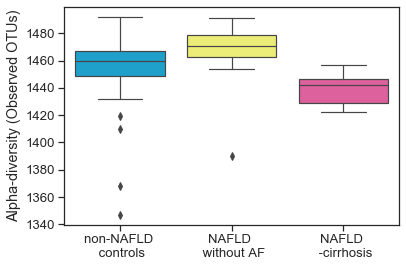

In [58]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
fig = sns.boxplot(y='observed_otus', x='groups', order=['G1P', 'G2P', 'G3P'], data=adiv, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Alpha-diversity (Observed OTUs)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
plt.savefig('diversity_analysis/figures/adiv_obsotus_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [59]:
ag1 = [adiv.loc[idx, 'observed_otus'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G1P']
ag2 = [adiv.loc[idx, 'observed_otus'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G2P']
ag3 = [adiv.loc[idx, 'observed_otus'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G3P']

In [60]:
# kruskal-wallis significance testing
print(statistics.median(ag1))
print(statistics.median(ag2))
print(statistics.median(ag3))
print(kruskal(ag1, ag2))
print(kruskal(ag2, ag3))
print(kruskal(ag1, ag3))

1459.5
1471.0
1442.0
KruskalResult(statistic=6.751400857129787, pvalue=0.009367410904181993)
KruskalResult(statistic=19.952776615979044, pvalue=7.9378596326957e-06)
KruskalResult(statistic=16.351228123970277, pvalue=5.26220514216727e-05)


The NAFLD-cirrhosis proband has a lower alpha diversity than the NAFLD without AF group (_p_=0.03). The plot and this KW significance test shows us that there is no significant difference between the the non-NAFLD controls and NAFLD without AF probands (_p_=0.18), and the non-NAFLD controls vs. NAFLD-cirrhosis probands (_p_=0.40).

### 1c. plotting trends in alpha diversity (Faith's PD)

In [62]:
adiv = pd.read_table('diversity_analysis/tables/alpha_faithpd_serum/alpha-diversity.tsv', index_col=0)

In [63]:
# alpha-div
adiv['groups'] = [md.loc[idx, 'ATTRIBUTE_groups'] for idx in adiv.index]

In [64]:
# save source data
adiv.reset_index().rename(columns={'index':'#SampleID'}).to_csv('diversity_analysis/tables/alpha_faithpd_serum/source_data_alpha_diversity_serum_faithpd.csv', 
                                                                sep=',', index=False)

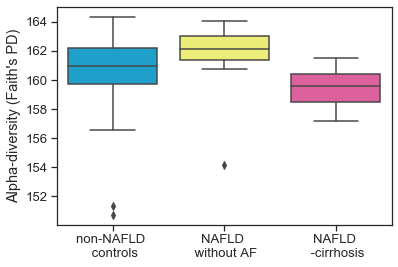

In [66]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
sns.set()
fig = sns.boxplot(y='faith_pd', x='groups', order=['G1P', 'G2P', 'G3P'], data=adiv, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Alpha-diversity (Faith's PD)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
#ax.set_ylim([123, 175])

plt.savefig('diversity_analysis/figures/adiv_faithpd_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')
#plt.savefig('figures/Adiv_faithpd_serum_zoom_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [67]:
ag1 = [adiv.loc[idx, 'faith_pd'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G1P']
ag2 = [adiv.loc[idx, 'faith_pd'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G2P']
ag3 = [adiv.loc[idx, 'faith_pd'] for idx in adiv.index if adiv.loc[idx, 'groups'] == 'G3P']

In [68]:
# kruskal-wallis significance testing
print(statistics.median(ag1))
print(statistics.median(ag2))
print(statistics.median(ag3))
print(kruskal(ag1, ag2))
print(kruskal(ag2, ag3))
print(kruskal(ag1, ag3))

160.9636625950583
162.1369564722125
159.57880395540224
KruskalResult(statistic=4.915625000000034, pvalue=0.02661483227149071)
KruskalResult(statistic=18.632867132867148, pvalue=1.5846491333413412e-05)
KruskalResult(statistic=9.6856594110115, pvalue=0.0018571172748121124)


The NAFLD-cirrhosis samples have the lowest diversity score as well as a significant difference between both the non-NAFLD controls (p<0.001) and the NAFLD w/o AF samples (p<0.001). There is also a significant difference between the non-NAFLD and NAFLD w/o AF samples (p<0.05).

### Calculating the beta diversity

To do this we used the qiime plugin to calculate bray curtis, aitchison, weighted and unweighted unifrac. We will be using the `serum-ft-matched-mnorm.qza` feature table

In [3]:
#The beta diversity using 'bray curtis'  
! qiime diversity beta \
--i-table ./feature_tables/serum-ft-matched-mnorm.qza \
--p-metric braycurtis \
--o-distance-matrix diversity_analysis/tables/beta_braycurtis_serum.qza

Saved DistanceMatrix to: diversity_analysis/tables/beta_braycurtis_serum.qza


In [4]:
! qiime tools export \
--input-path ./diversity_analysis/tables/beta_braycurtis_serum.qza \
--output-path ./diversity_analysis/tables/beta_braycurtis_serum

Exported ./diversity_analysis/tables/beta_braycurtis_serum.qza as DistanceMatrixDirectoryFormat to directory ./diversity_analysis/tables/beta_braycurtis_serum


In [5]:
#The beta diversity using 'aitchison'  
! qiime diversity beta \
--i-table ./feature_tables/serum-ft-matched-mnorm.qza \
--p-metric aitchison \
--o-distance-matrix diversity_analysis/tables/beta_aitchison_serum.qza

Saved DistanceMatrix to: diversity_analysis/tables/beta_aitchison_serum.qza


In [6]:
! qiime tools export \
--input-path diversity_analysis/tables/beta_aitchison_serum.qza \
--output-path diversity_analysis/tables/beta_aitchison_serum

Exported diversity_analysis/tables/beta_aitchison_serum.qza as DistanceMatrixDirectoryFormat to directory diversity_analysis/tables/beta_aitchison_serum


In [7]:
#The beta diversity using unweighted unifrac
! qiime diversity beta-phylogenetic \
--i-table feature_tables/serum-ft-matched-mnorm.qza \
--i-phylogeny ./diversity_analysis/qemistree-serum.qza \
--p-metric unweighted_unifrac \
--o-distance-matrix diversity_analysis/tables/beta_uwunifrac_serum.qza

Saved DistanceMatrix % Properties('phylogenetic') to: diversity_analysis/tables/beta_uwunifrac_serum.qza


In [8]:
! qiime tools export \
--input-path diversity_analysis/tables/beta_uwunifrac_serum.qza \
--output-path diversity_analysis/tables/beta_uwunifrac_serum

Exported diversity_analysis/tables/beta_uwunifrac_serum.qza as DistanceMatrixDirectoryFormat to directory diversity_analysis/tables/beta_uwunifrac_serum


In [9]:
#The beta diversity using weighted unifrac
! qiime diversity beta-phylogenetic \
--i-table feature_tables/serum-ft-matched-mnorm.qza \
--i-phylogeny diversity_analysis/qemistree-serum.qza \
--p-metric weighted_unifrac \
--o-distance-matrix diversity_analysis/tables/beta_wunifrac_serum.qza

Saved DistanceMatrix % Properties('phylogenetic') to: diversity_analysis/tables/beta_wunifrac_serum.qza


In [10]:
! qiime tools export \
--input-path diversity_analysis/tables/beta_wunifrac_serum.qza \
--output-path diversity_analysis/tables/beta_wunifrac_serum

Exported diversity_analysis/tables/beta_wunifrac_serum.qza as DistanceMatrixDirectoryFormat to directory diversity_analysis/tables/beta_wunifrac_serum


In [5]:
bcdm = ssd.DistanceMatrix.read('diversity_analysis/tables/beta_braycurtis_serum/distance-matrix.tsv')
aidm = ssd.DistanceMatrix.read('diversity_analysis/tables/beta_aitchison_serum/distance-matrix.tsv')
uwdm = ssd.DistanceMatrix.read('diversity_analysis/tables/beta_uwunifrac_serum/distance-matrix.tsv')
wdm = ssd.DistanceMatrix.read('diversity_analysis/tables/beta_wunifrac_serum/distance-matrix.tsv' )
sample_arr = (bcdm.ids)

In [8]:
# list of samples in each group
sg1 = [idx for idx in sample_arr if md.loc[idx, 'ATTRIBUTE_groups'] == 'G1P']
sg2 = [idx for idx in sample_arr if md.loc[idx, 'ATTRIBUTE_groups'] == 'G2P']
sg3 = [idx for idx in sample_arr if md.loc[idx, 'ATTRIBUTE_groups'] == 'G3P']

In [9]:
# all possible pairs in each group
pg1 = list(itertools.combinations(sg1, 2))
pg2 = list(itertools.combinations(sg2, 2))
pg3 = list(itertools.combinations(sg3, 2))

In [10]:
len(pg3)

231

In [11]:
# bray curtis distances
bcdg1 = [bcdm[pair] for pair in pg1]
bcdg2 = [bcdm[pair] for pair in pg2]
bcdg3 = [bcdm[pair] for pair in pg3]

In [12]:
#aitchison distances
aidg1 = [aidm[pair] for pair in pg1]
aidg2 = [aidm[pair] for pair in pg2]
aidg3 = [aidm[pair] for pair in pg3]

In [13]:
#unweighted unifrac distances
uwdg1 = [uwdm[pair] for pair in pg1]
uwdg2 = [uwdm[pair] for pair in pg2]
uwdg3 = [uwdm[pair] for pair in pg3]

In [14]:
#weighted unifrac distances
wdg1 = [wdm[pair] for pair in pg1]
wdg2 = [wdm[pair] for pair in pg2]
wdg3 = [wdm[pair] for pair in pg3]

In [15]:
#dataframe to plot bdiv
pdf = pd.DataFrame(index=pd.MultiIndex.from_tuples(pg1+pg2+pg3), 
                   columns=['bray_curtis','aitchison', 'unweighted_unifrac','weighted_unifrac','groups'])
# assign groups
pdf.groups=['G1P']*len(pg1)+['G2P']*len(pg2)+['G3P']*len(pg3)

# assign distances
pdf.bray_curtis=bcdg1+bcdg2+bcdg3
pdf.aitchison=aidg1+aidg2+aidg3
pdf.unweighted_unifrac=uwdg1+uwdg2+uwdg3
pdf.weighted_unifrac=wdg1+wdg2+wdg3

In [22]:
#save source data
pdf.to_csv('diversity_analysis/tables/source_data_beta_diversity_serum_bc_ai_uw_w.csv')

### 2a. plotting trends in beta diversity (braycurtis)

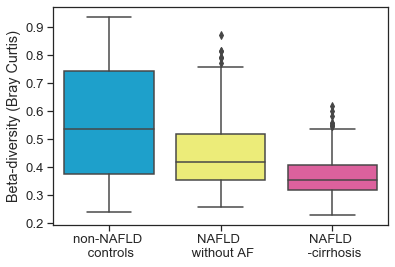

In [23]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
sns.set()
sns.boxplot(y='bray_curtis', x='groups', order=['G1P', 'G2P', 'G3P'], data=pdf, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Beta-diversity (Bray Curtis)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
plt.savefig('diversity_analysis/figures/bdiv_braycurtis_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [24]:
bg1 = [pdf.loc[idx, 'bray_curtis'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G1P']
bg2 = [pdf.loc[idx, 'bray_curtis'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G2P']
bg3 = [pdf.loc[idx, 'bray_curtis'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G3P']

print(statistics.median(bg1))
print(statistics.median(bg2))
print(statistics.median(bg3))
print(kruskal(bg1, bg2))
print(kruskal(bg2, bg3))
print(kruskal(bg1, bg3))

0.5348378242790097
0.41718157081137985
0.3544081890889492
KruskalResult(statistic=24.21113919504387, pvalue=8.633151561178114e-07)
KruskalResult(statistic=33.52376156040941, pvalue=7.039867285365064e-09)
KruskalResult(statistic=175.3052517283504, pvalue=5.135087794113415e-40)


For Bray-Curtis we see a trend of decreasing diversity as disease state increases, with NAFLD-cirrhosis samples having the lowest median diversity score. There are significant differences between each of the groups (p<0.001).

### 2b. plotting trends in beta diversity (aitchison)

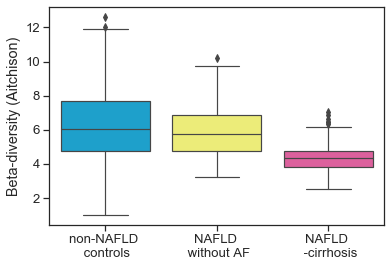

In [25]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
sns.boxplot(y='aitchison', x='groups', order=['G1P', 'G2P', 'G3P'], data=pdf, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Beta-diversity (Aitchison)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
#ax.set_ylim([0.3, 1])
plt.savefig('diversity_analysis/figures/bdiv_aitchison_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [26]:
bg1 = [pdf.loc[idx, 'aitchison'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G1P']
bg2 = [pdf.loc[idx, 'aitchison'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G2P']
bg3 = [pdf.loc[idx, 'aitchison'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G3P']

print(statistics.median(bg1))
print(statistics.median(bg2))
print(statistics.median(bg3))
print(kruskal(bg1, bg2))
print(kruskal(bg2, bg3))
print(kruskal(bg1, bg3))

6.058866819194119
5.742337900747527
4.341344398244429
KruskalResult(statistic=4.01921714676655, pvalue=0.04498458974732385)
KruskalResult(statistic=95.45466843762279, pvalue=1.5131684051223423e-22)
KruskalResult(statistic=221.36733447247298, pvalue=4.551318008858566e-50)


Here we see that the non-NAFLD controls have a significnatly higher diversity score compared to both NAFLD w/o AF probands (p<0.001) and NAFLD-cirrhosis samples (p<0.001). This follows similarly to the trend identified using Bray-Curtis metric.

### 2c. plotting trends in beta diversity (unweighted unifrac distances)

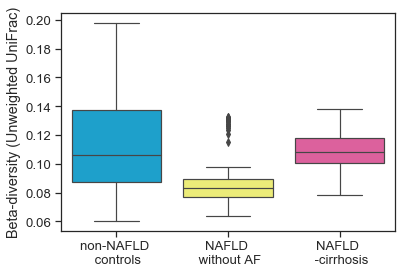

In [27]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
sns.boxplot(y='unweighted_unifrac', x='groups', order=['G1P', 'G2P', 'G3P'], data=pdf, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Beta-diversity (Unweighted UniFrac)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
#ax.set_ylim([0.3, 1])
plt.savefig('diversity_analysis/figures/bdiv_uwunifrac_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [31]:
bg1 = [pdf.loc[idx, 'unweighted_unifrac'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G1P']
bg2 = [pdf.loc[idx, 'unweighted_unifrac'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G2P']
bg3 = [pdf.loc[idx, 'unweighted_unifrac'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G3P']

print(statistics.median(bg1))
print(statistics.median(bg2))
print(statistics.median(bg3))
print(kruskal(bg1, bg2))
print(kruskal(bg2, bg3))
print(kruskal(bg1, bg3))

0.10633753570656385
0.08305789000251637
0.10796479308225045
KruskalResult(statistic=104.22681407537311, pvalue=1.8043214554501282e-24)
KruskalResult(statistic=131.56440500787085, pvalue=1.863300044084612e-30)
KruskalResult(statistic=0.0012744556229336013, pvalue=0.9715219544699385)


We see a decrease in beta diversity (using unweighted uniFrac) among the three probands, with the non-NAFLD controls having the highest diversity and the NAFLD-cirrhosis group having the lowest. ALl the groups are significantly different from one another (_p_<0.001).

### 2d. plotting trends in beta diversity (weighted unifrac distances)

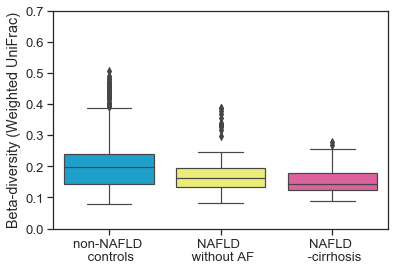

In [16]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
fig, ax = plt.subplots()
sns.boxplot(y='weighted_unifrac', x='groups', order=['G1P', 'G2P', 'G3P'], data=pdf, 
           palette={'G1P':'#01AEE8','G2P':'#ffff66','G3P':'#F04D9C'}, ax=ax)
ax.set(xlabel='', ylabel="Beta-diversity (Weighted UniFrac)")
ax.set_xticklabels(['non-NAFLD \n controls', 'NAFLD \n without AF', 'NAFLD \n -cirrhosis'])
ax.set_ylim([0.0, 0.7])
plt.savefig('diversity_analysis/figures/bdiv_wunifrac_serum_G1PG2PG3P.pdf', bbox_to_inches='tight')

In [32]:
bg1 = [pdf.loc[idx, 'weighted_unifrac'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G1P']
bg2 = [pdf.loc[idx, 'weighted_unifrac'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G2P']
bg3 = [pdf.loc[idx, 'weighted_unifrac'] for idx in pdf.index if pdf.loc[idx, 'groups'] == 'G3P']

print(statistics.median(bg1))
print(statistics.median(bg2))
print(statistics.median(bg3))
print(kruskal(bg1, bg2))
print(kruskal(bg2, bg3))
print(kruskal(bg1, bg3))

0.19892284640944247
0.1630288224023484
0.1443657846946985
KruskalResult(statistic=12.897580475727864, pvalue=0.0003290071721326886)
KruskalResult(statistic=10.52197092680035, pvalue=0.0011796360661530795)
KruskalResult(statistic=89.49168278529942, pvalue=3.0793032030013805e-21)


We see a decrease in beta diversity (using weighted uniFrac) among the three probands, with the non-NAFLD controls having the highest diversity and the NAFLD-cirrhosis group having the lowest. ALl the groups are significantly different from one another (_p_<0.001).

### Future Directions

Focusing on Faith PD/Obs OTUs for Alpha as they match the trend of decreasing diversity, as seen in microbiome. For beta, focus on Weighted Unifrac, shows same trend as Bray-Curtis and Aitchison but uses phylogenetic information as well. Matches trend of alpha div. Decreasing alpha diversity suggests decrease in overall richness of metabolome. Decrease in beta diversity suggests that the samples are more similar and all converging on a similar non-diverse serum metabolome.